In [5]:
import numpy as np
import stock
import shared
import kline
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [81]:
c,k,d = stock.loadKline('SZ:399001')

In [82]:
dp = k[1:,4]-k[:-1,4]
dv = k[1:,0]-k[:-1,0]

Box(children=(Button(description='上一页', style=ButtonStyle()), Button(description='下一页', style=ButtonStyle()), …

Output()

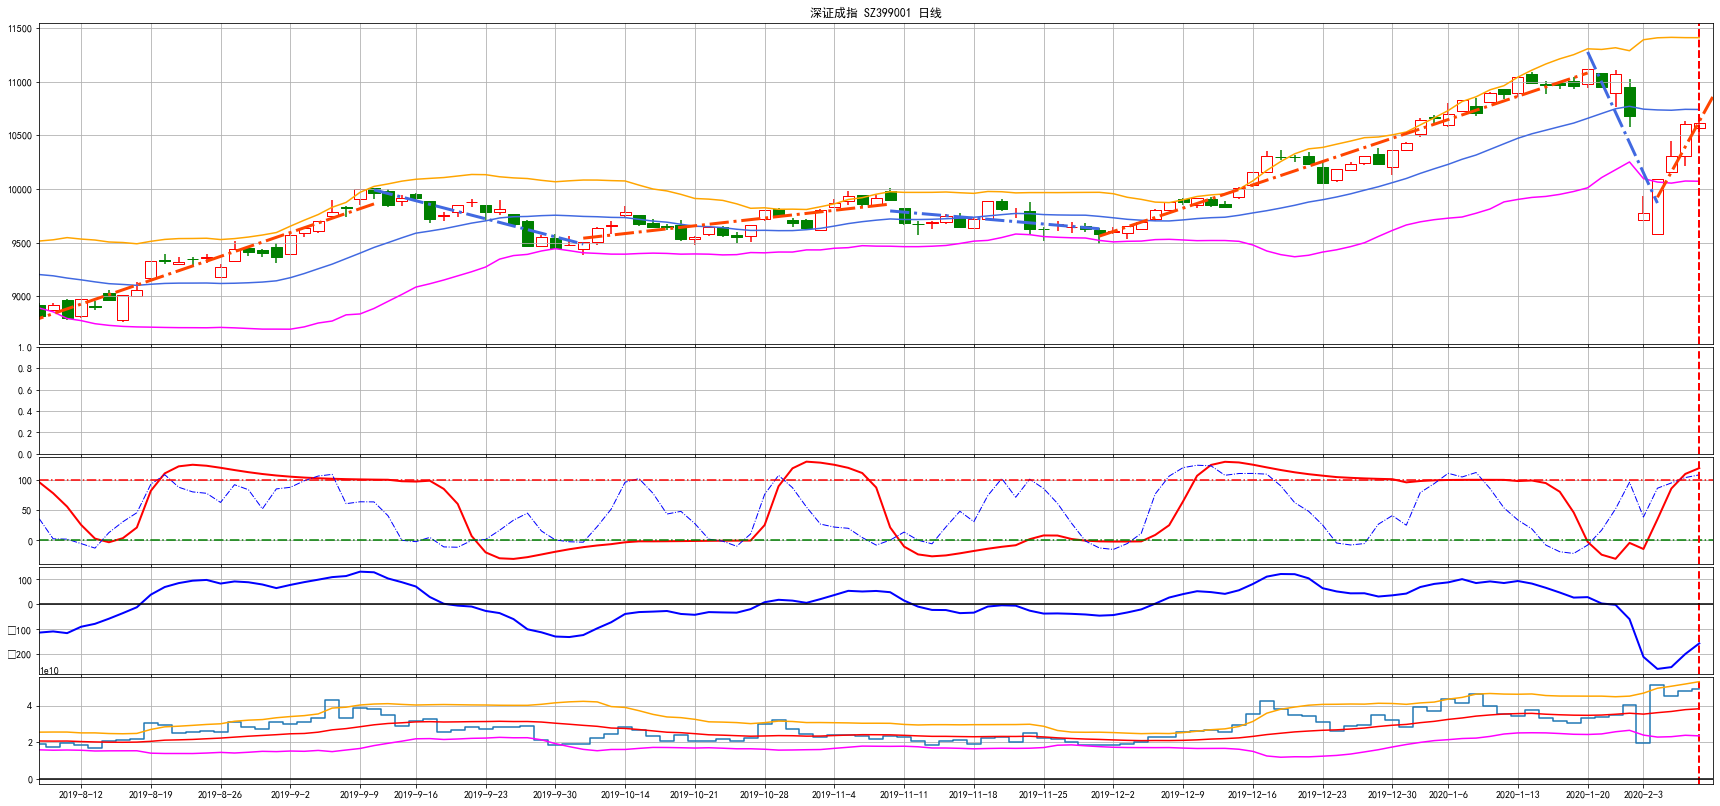

In [83]:
kline.Plote('SZ:399001',config={'index':True,'figure':[
    [{
        'data':dp,
        'color':'blue'
    },
    {
        'data':dv,
        'color':'red'
    }]
]}).show()

In [84]:
def distributed2d(x,y,N=100):
    maxy = y.max()
    miny = y.min()
    maxx = x.max()
    minx = x.min()
    ds = np.zeros((N,N),dtype='int32')
    for i in range(len(x)):
        inx = math.floor((x[i]-minx)*N/(maxx-minx))
        iny = math.floor((y[i]-miny)*N/(maxy-miny))
        if inx>=N:
            inx = N-1
        if iny>=N:
            iny = N-1
        ds[inx,iny] += 1
    return ds

def plote3d(x,y,ds,N=100):
    maxy = y.max()
    miny = y.min()
    maxx = x.max()
    minx = x.min()
    
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection='3d')

    # fake data
    _xx, _yy = np.meshgrid(np.linspace(minx,maxx,N),np.linspace(miny,maxy,N))
    xpos = _xx.ravel()
    ypos = _yy.ravel()
    zpos = 0
    dx = (maxx-minx)/N
    dy = (maxy-miny)/N
    dz = ds.ravel()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.show()

In [85]:
ds = distributed2d(dv,dp)

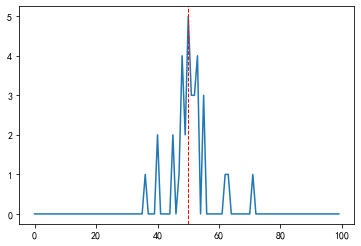

In [107]:
plt.plot(np.arange(100),ds[42,:])
plt.axvline(50,color="red",linewidth=1,linestyle='--')